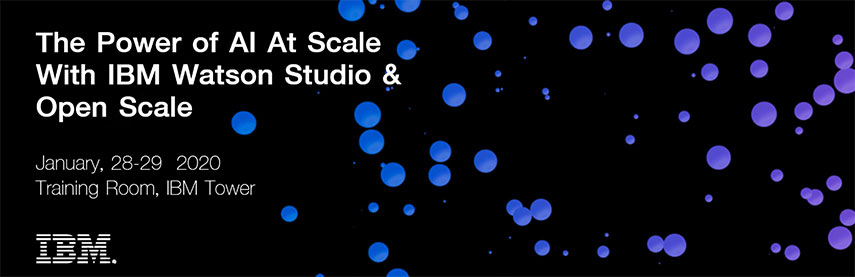

## Fraud Detection using Machine Learning

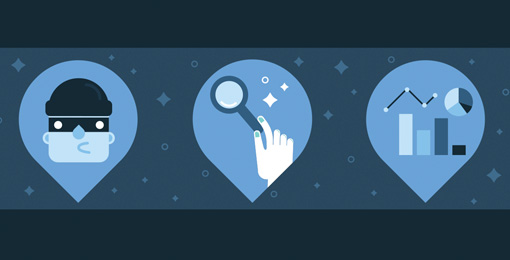

### Instal python library

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install lightgbm
!pip install "ipywidgets==7.5"
!pip install seaborn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import ipaddress
import pandas_profiling as pp
%matplotlib inline
from sklearn import preprocessing
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

     | 31.8MB 20.2MB/s
     |████████████████████████████████| 614kB 23.1MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.tmp/pip-ephem-wheel-cache-j4_o1a2j/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Stored in directory: /home/dsxuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Stored in directory: /home/dsxuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling confuse htmlmin
     |████████████████████████████████| 1.2MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 122kB 18.0MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 24.0MB/s eta 0:00:01
  Found existing installation: widgetsnbextension 3.4.2
    Uninstalling widgetsnbextension-3.4.2:
      Successfully uninstalled widgetsnbextension-3.4.2
  Found existing installation: ipywidgets 7.4.2
    Uninstalling ipywidgets-7.4.2:
      Successfully uninstalled ipywidgets-7.4.2


### Import Data

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1ee47abf5a6f49e9bf4038a49233d035 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SvUPACUUB-x2Gsn8-Hb6TWmg0BWNg3lyYoawrDUDYZ_9',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1ee47abf5a6f49e9bf4038a49233d035.get_object(Bucket='ibmwatsonstudioampopenscaleworksh-donotdelete-pr-zabaxvri8uoz4w',Key='fraud_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
df = df_data_1
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
5,1,1,2,1,1,5417,4196,267,360,1,0,1,1
6,1,1,0,0,1,2333,1516,95,360,1,1,1,1
7,1,1,3,1,1,3036,2504,158,360,0,1,2,1
8,1,1,2,1,1,4006,1526,168,360,1,1,1,1
9,1,1,1,1,1,12841,10968,349,360,1,0,2,1


In [8]:
df = pd.read_csv("./data/fraud_dataset.csv") #USER INPUT
pd.set_option('display.max_colwidth', 0)
pd.options.display.max_rows=1000
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
5,1,1,2,1,1,5417,4196,267,360,1,0,1,1
6,1,1,0,0,1,2333,1516,95,360,1,1,1,1
7,1,1,3,1,1,3036,2504,158,360,0,1,2,1
8,1,1,2,1,1,4006,1526,168,360,1,1,1,1
9,1,1,1,1,1,12841,10968,349,360,1,0,2,1


### We can observe that there are no missing values and no duplicates. We can do detailed analysis of each attribute to understand the data better. 

In [5]:
count_fraud = len(df[df['Fraud_Risk']==0])
count_non_fraud = len(df[df['Fraud_Risk']==1])
pct_of_non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk is", round(pct_of_non_fraud*100,2))
pct_of_fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk", round(pct_of_fraud*100,2))

percentage of non Fraud Risk is 57.68
percentage of Fraud Risk 42.32


### Plot the target attribute

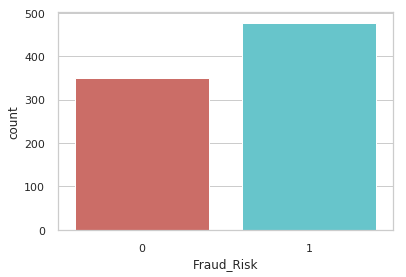

In [6]:
import seaborn as sns
sns.countplot(x='Fraud_Risk',data=df, palette='hls')
plt.show()

In [7]:
df.groupby('Fraud_Risk').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


In [8]:
df.corr(method ='pearson') 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
Gender,1.000000,0.355319,0.121868,-0.080883,0.256583,0.010382,0.116468,0.089613,-0.074194,-0.019499,-0.006226,-0.002798,0.309570
Married,0.355319,1.000000,0.375512,-0.034168,0.829158,0.071710,0.106108,0.175254,-0.108588,-0.085615,-0.093419,-0.019892,0.825064
Dependents,0.121868,0.375512,1.000000,-0.025549,0.349978,0.130331,0.026961,0.182559,-0.050031,-0.085019,-0.022433,-0.012152,0.315421
Education,-0.080883,-0.034168,-0.025549,1.000000,-0.027868,0.127969,0.050707,0.154714,0.109241,0.057124,0.001073,-0.103206,-0.037406
Self_Employed,0.256583,0.829158,0.349978,-0.027868,1.000000,0.138274,0.078241,0.229533,-0.104434,-0.049356,-0.106595,-0.049677,0.688170
ApplicantIncome,0.010382,0.071710,0.130331,0.127969,0.138274,1.000000,-0.120363,0.564923,-0.004199,-0.022038,-0.049480,-0.018499,0.066347
CoapplicantIncome,0.116468,0.106108,0.026961,0.050707,0.078241,-0.120363,1.000000,0.165940,-0.054756,-0.035843,-0.018713,0.003190,0.120304
LoanAmount,0.089613,0.175254,0.182559,0.154714,0.229533,0.564923,0.165940,1.000000,0.073583,-0.024920,-0.084477,0.022021,0.164087
Loan_Term,-0.074194,-0.108588,-0.050031,0.109241,-0.104434,-0.004199,-0.054756,0.073583,1.000000,0.076045,0.026219,0.084809,-0.097339
Credit_History_Available,-0.019499,-0.085615,-0.085019,0.057124,-0.049356,-0.022038,-0.035843,-0.024920,0.076045,1.000000,0.017112,-0.005251,-0.239512


We can observe strong positive co-relation between the attributes Married & Self Employed to the target variable which is Fraud Risk.

### Select input and target variables

In [9]:
X = df[df.columns[0:12]]
y = df[df.columns[12:]]

In [10]:
df.dtypes

Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome           int64
LoanAmount                  int64
Loan_Term                   int64
Credit_History_Available    int64
Housing                     int64
Locality                    int64
Fraud_Risk                  int64
dtype: object

We can observe that all the attributes are in Int data type.

Check for null values

#### isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy. NaN, gets mapped to True values.

In [11]:
df.isna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Splitting the data with 70:30 mix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
print("Train_x Shape :: ", X_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", X_test.shape)
print("Test_y Shape :: ", y_test.shape)

Train_x Shape ::  (578, 12)
Train_y Shape ::  (578, 1)
Test_x Shape ::  (249, 12)
Test_y Shape ::  (249, 1)


In [15]:
d_train = lgb.Dataset(X_train, label=y_train)

Building the model with default parameters

In [ ]:
def LGBM_classifier(features, target):
    """
    To train the LGBM classifier with features and target data
    :param features:
    :param target:
    :return: trained LGBM classifier
    """
    model = LGBMClassifier(metric='binary_logloss', objective='binary')
    model.fit(features, target)
    return model

start = time.time()
trained_model = LGBM_classifier(X_train, y_train.values.ravel())
print("> Completion Time : ", time.time() - start)
print("Trained LGBM model :: ", trained_model)
predictions = trained_model.predict(X_test)

In [17]:
print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("LGBM Model Test Accuracy is :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
LGBM Model Test Accuracy is ::  0.9230769230769231


We can observe that the model has achieved 92% accuracy on test data and 100% accuracy on train data.

In [18]:
print(" Confusion matrix ", confusion_matrix(y_test, predictions))

 Confusion matrix  [[102   5]
 [ 14 126]]


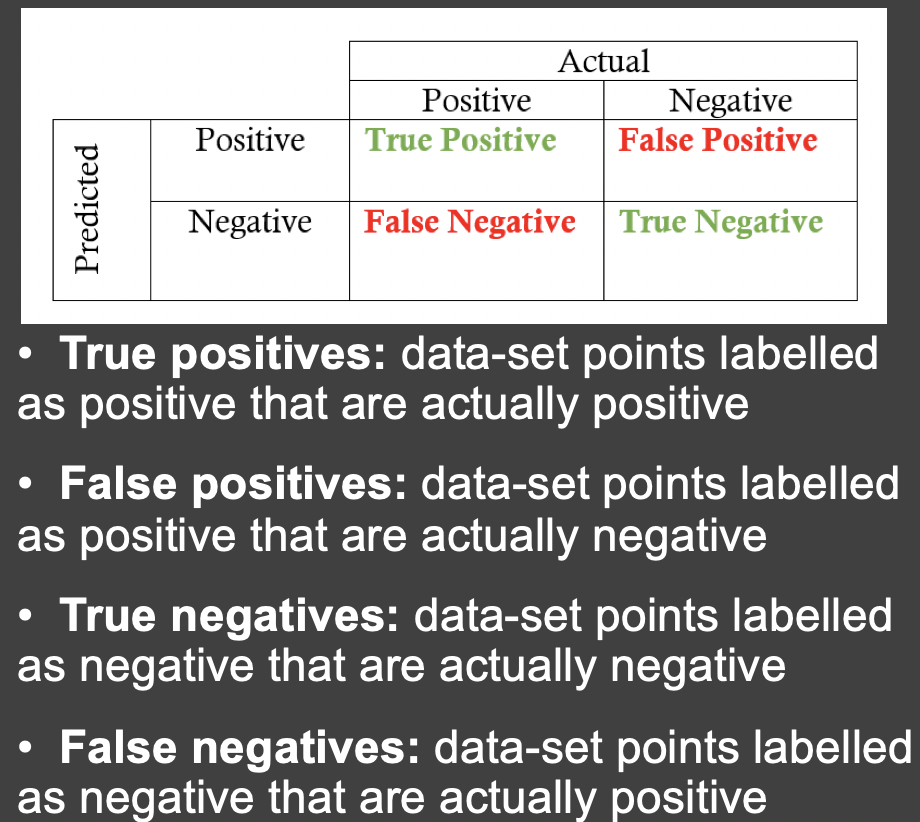

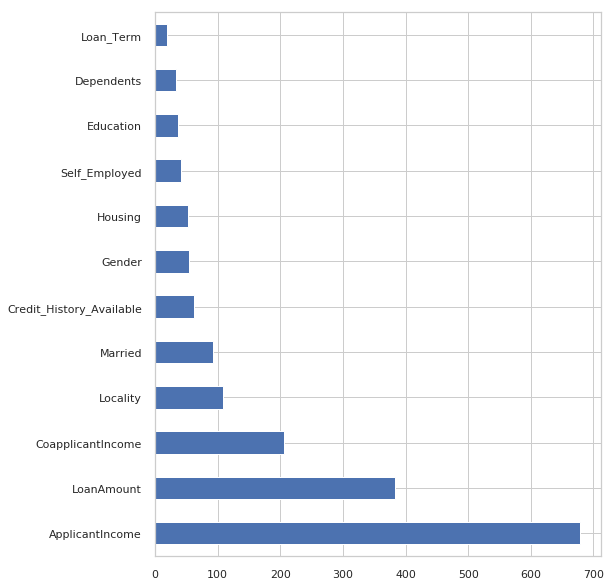

In [19]:
feat_imp = pd.Series(trained_model.feature_importances_, index=X.columns)
feat_imp.nlargest(12).plot(kind='barh', figsize=(8,10))

Feature importance as per the model

### SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. 

In [20]:
!pip install shap

     |████████████████████████████████| 266kB 7.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [21]:
import shap
shap.initjs()

In [22]:
shap_values = shap.TreeExplainer(trained_model.booster_).shap_values(X_train)

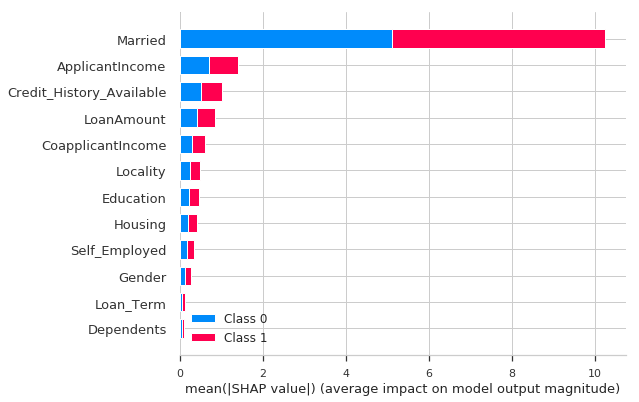

In [23]:
shap.summary_plot(shap_values, X_train)

We can observe that attributes like Married, ApplicantIncome, Credit_History_Available, LoanAMount & CoapplicantIncome have high impact on the target variable. 

### In this notebook, we have done exploratory data analysis, feature importance, model building & interpreting the model attributes for improving the accuracy. This is to demonstrate some of the mandatory steps which are involved in building predictive models which are done manually. These steps can take days to complete. All these steps are automated in AutoAI feature in Watson Studio where we can create and deploy machine learning models in minutes. 